<a href="https://colab.research.google.com/github/jhoynoski/NLP_Progress/blob/main/NLP_Beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
from pathlib import Path

all_txt_files =[]
for file in Path("filepath").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)
n_files = len(all_txt_files)
print("Documents imported: ",n_files)
all_txt_files.sort()
all_txt_files[0]

all_docs = []
for txt_file in all_txt_files:
    with open(txt_file) as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words="english", use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(all_docs)

transformed_documents_as_array = transformed_documents.toarray()
print("Documents: ",len(transformed_documents_as_array))

import pandas as pd
Path("./TF_IDF").mkdir(parents=True, exist_ok=True)
output_filenames = [str(txt_file).replace(".txt", ".csv").replace("txt/", "tf_idf_output/") for txt_file in all_txt_files]
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df.to_csv(output_filenames[counter])

Documents imported:  4
Documents:  4


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
corpus = (txt_file_as_string.lower()).split(',')

uniques = []
for word in corpus:
  if word not in stop_words:
      if word not in uniques:
          uniques.append(word)

counts = []
for unique in uniques:
  count = 0
  for word in corpus:
    if word == unique:
      count += 1
  counts.append((count, unique))

counts.sort()
counts.reverse()

for i in range(min(20, len(counts))):
  count, word = counts[i]
  print('%s %d' % (word, count))

"naturalresources" 264
"landbounderies" 261
"capital" 256
"population" 240
"industries" 236
"agriculture" 232
"importpartners" 231
"importcommodities" 231
"exportpartners" 231
"exportcommodities" 231
"memberof" 230
"upu" 170
"un" 163
"unctad" 161
"who" 154
"unesco" 148
"unido" 147
"itu" 126
"icao" 122
"wipo" 121


Text(0.5, 0.98, 'Top 20 Most Frequent Words')

<Figure size 432x288 with 0 Axes>

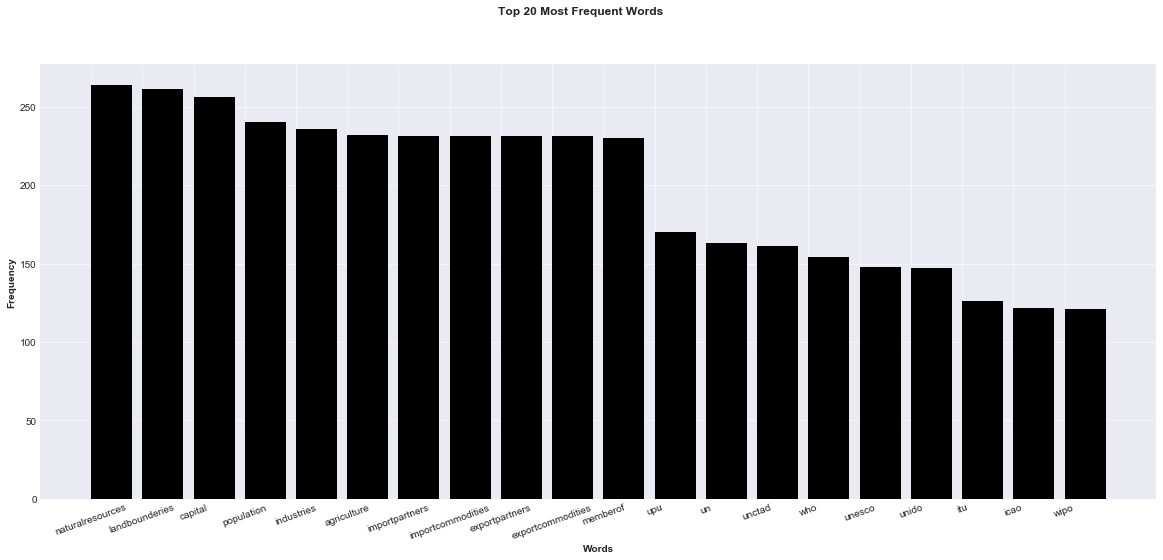

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
Fig_1 = plt.figure(1)
labels = ('naturalresources', 'landbounderies', 'capital', 'population', 'industries', 'agriculture', 'importpartners', 'importcommodities', 'exportpartners', 'exportcommodities', 'memberof', 'upu', 'un', 'unctad', 'who', 'unesco', 'unido', 'itu', 'icao', 'wipo')
y = [264, 261, 256, 240, 236, 232, 231, 231, 231, 231, 230, 170, 163, 161, 154, 148, 147, 126, 122, 121]

plt.figure(figsize = (20,8))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.bar(labels, y, align = 'edge', color = 'black')
plt.grid(linestyle='-', linewidth='0.6')
plt.xticks((labels), rotation=20)
plt.ylabel('Frequency',fontweight = 'bold')
plt.xlabel('Words',fontweight = 'bold')
plt.suptitle('Top 20 Most Frequent Words',fontweight = 'bold')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(transformed_documents)
print("Cosine Similarity: ",dist)

from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(transformed_documents)
clusters = km.labels_.tolist()
print("K-Means: ",clusters)

Cosine Similarity:  [[ 3.33066907e-16  1.00000000e+00  9.49665098e-01  1.00000000e+00]
 [ 1.00000000e+00  1.11022302e-16  9.96073048e-01  9.99969025e-01]
 [ 9.49665098e-01  9.96073048e-01 -1.55431223e-14  9.78534666e-01]
 [ 1.00000000e+00  9.99969025e-01  9.78534666e-01  3.10862447e-15]]
K-Means:  [1, 3, 2, 0]
